# IT'S TIME TO GENERATE NEW CARS IMAGES

![Inference.png](https://drive.google.com/uc?export=view&id=12JP9twsCjRrOuWBL_uws4Wt0ySUK8EsF)

Measure the GAN performance by:

* Images Quality
* Images Diversity

### Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imports

In [ ]:
from glob import glob
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Input
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers import (Activation, BatchNormalization, Concatenate, Dense,
                          Embedding, Flatten, Input, Multiply, Reshape)
from keras.layers.advanced_activations import LeakyReLU, ReLU
from keras.models import Model, Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import OrdinalEncoder

### Configs

In [ ]:
CHECKPOINT_DIR = '/content/drive/My Drive/lecture hands on lab/cGAN/results/inference_checkpoint'
# Data path
DATA_PATH = "/content/drive/My Drive/lecture hands on lab/datasets/cars/cars_images/"
LR = 1e-4
LATENT_DEPTH = 100

### Data

In [ ]:
# Extract cars models
def unique(list1): 
    list_set = set(list1) 
    unique_list = (list(list_set)) 
    return unique_list

In [ ]:
cars_images_path = list(glob(str(DATA_PATH + '*.jpg')))
images_name = [i.split(DATA_PATH) for i in cars_images_path]
images_name = [x[:][1] for x in images_name]
cars_model = [i.split('_')[0] for i in images_name]
unique_cars = unique(cars_model)
cars_array = np.reshape(unique_cars,(-1, 1))
encoder = OrdinalEncoder()
encoder.fit(cars_array)
label_encoded = encoder.transform(cars_array)

## Loading Checkpoint

In [ ]:
def make_generator_model(latent_dim, n_classes=20):
    # label input
    # embedding for categorical input
    # linear multiplication
    # reshape to additional channel

    label = Input(shape=(1,))
    label_embedding = Embedding(n_classes, 50)(label)
    label_embedding = Dense(25 * 25)(label_embedding)
    label_embedding = Reshape((25, 25, 1))(label_embedding)

    input_noise = Input(shape=(latent_dim,))
    layer = Dense(128 * 25 * 25)(input_noise)
    layer = ReLU()(layer)
    layer = Reshape((25, 25, 128))(layer)
    merge = Concatenate()([layer, label_embedding])


    layer = Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', use_bias=False)(merge)
    layer = ReLU()(layer)

    layer = Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False)(layer)
    layer = ReLU()(layer)

    output_layer = Conv2DTranspose(3, (5,5), strides=(2,2), activation='sigmoid', padding='same', use_bias=False)(layer)

    model = Model([input_noise, label], output_layer)
    model.summary()
    return model

In [ ]:
generator = make_generator_model(latent_dim=100)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 80000)        8080000     input_2[0][0]                    
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 50)        1000        input_1[0][0]                    
_______________________________________________________________________________________

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(lr=LR)

In [ ]:
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer, generator=generator)

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(CHECKPOINT_DIR))

## Inference

After using the inference method we can tell if there is model collapse or no

In [ ]:
def generate_images(model, label):
    
    plt.figure(figsize=(15,10))

    for i in range(4):
        noise = tf.random.normal([1,100])
        images = model([noise, label], training=False)
        image = images[0, :, :, :]
        image = np.reshape(image, [100, 100, 3])

        plt.subplot(1, 4, i+1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title("Randomly Generated Images_")

    plt.tight_layout()  
    plt.show()

* 0: 'Chrysler'
* 1: 'Audi'
* 2: 'Aston Martin'
* 3: 'Tesla'
* 4: 'Volvo'
* 5: 'Rolls-Royce'
* 6: 'Bentley',
* 7: 'Chevrolet'
* 8: 'Buick'
* 9: 'Alfa Romeo'
* 10: 'Nissan'
* 11: 'Ram'
* 12: 'Cadillac'
* 13: 'Porsche'
* 14: 'Toyota'
* 15: 'Volkswagen'
* 16: 'smart'
* 17: 'Acura'
* 18: 'Subaru'
* 19: 'BMW'


In [ ]:
x = label_encoded[7] 

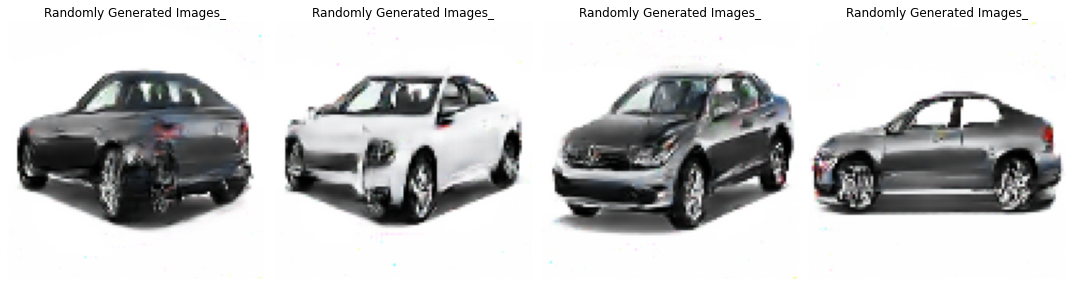

In [ ]:
generate_and_save_images(generator, x)